In [2]:
!pip install requests

In [3]:
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

def gaussian_noise(image, mean=0, sigma=25):
    row, col = image.shape
    gauss = np.random.normal(mean, sigma, (row, col))
    noisy = np.clip(image + gauss, 0, 255)
    return noisy.astype(np.uint8)

## Edge detection using custom kernel

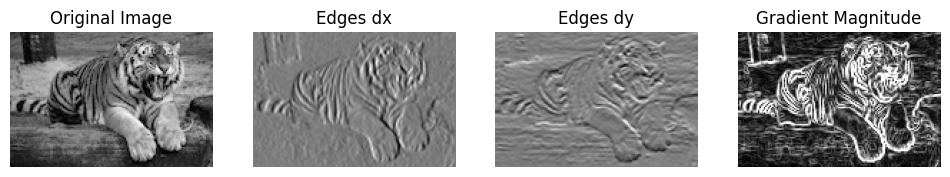

In [5]:
# Read the image
image = cv2.imread('data/images/tiger.jpg', cv2.IMREAD_GRAYSCALE)

# Define a custom kernel for edge detection (Sobel operator)
kernelx = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

kernely = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

# Apply the custom kernel using convolution
edgesx = cv2.filter2D(image, cv2.CV_32F, kernelx)
edgesy = cv2.filter2D(image, cv2.CV_32F, kernely)
mag = np.sqrt(edgesx**2 + edgesy**2).astype(np.uint)
theta = np.arctan(edgesy/(edgesx+.000001))

# Display the original image and the edges obtained with the custom kernel
plt.figure(figsize=(12, 10))
plt.subplot(141), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(142), plt.imshow(edgesx, cmap='gray')
plt.title('Edges dx'), plt.axis('off')
plt.subplot(143), plt.imshow(edgesy, cmap='gray')
plt.title('Edges dy'), plt.axis('off')
plt.subplot(144), plt.imshow(mag, cmap='gray', vmin=0, vmax=360)
plt.title('Gradient Magnitude'), plt.axis('off')
plt.show()


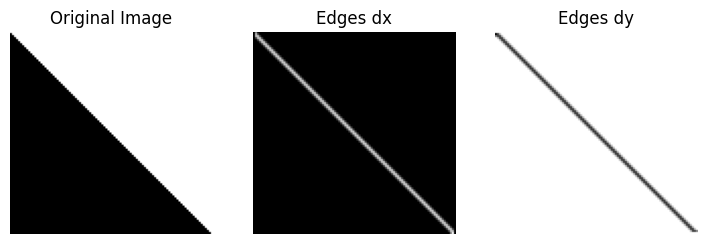

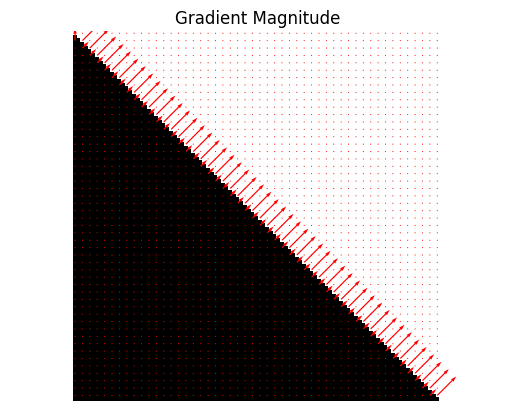

In [6]:
# Read the image
image = np.ones((100, 100), dtype=np.uint8)*255

for i in range(100):
    for j in range(i):
        image[i, j] = 0


# Define a custom kernel for edge detection (Sobel operator)
kernelx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

kernely = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])

# Apply the custom kernel using convolution
edgesx = cv2.filter2D(image, cv2.CV_32F, kernelx)
edgesy = cv2.filter2D(image, cv2.CV_32F, kernely)

# Display the original image and the edges obtained with the custom kernel
plt.figure(figsize=(12, 10))
plt.subplot(141), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(142), plt.imshow(edgesx, cmap='gray')
plt.title('Edges dx'), plt.axis('off')
plt.subplot(143), plt.imshow(edgesy, cmap='gray')
plt.title('Edges dy'), plt.axis('off')
plt.show()

plt.imshow(image, cmap='gray')
step=2
x, y = np.meshgrid(np.arange(0, image.shape[1], step), np.arange(0, image.shape[0], step))
# Extract gradient values at sampled points
u = edgesx[::step, ::step]
v = edgesy[::step, ::step]
plt.quiver(x, y, u, v,  color="red", angles='xy', scale=20000)
plt.title('Gradient Magnitude'), plt.axis('off'), plt.axis('equal')
plt.show()


In [7]:
# Get derivative kernel coefficients
k = cv2.getDerivKernels(dx=1,dy=0,ksize=3,normalize=False)
np.outer(k[1],k[0])


array([[-1.,  0.,  1.],
       [-2.,  0.,  2.],
       [-1.,  0.,  1.]], dtype=float32)

## Edge detection using Sobel operator

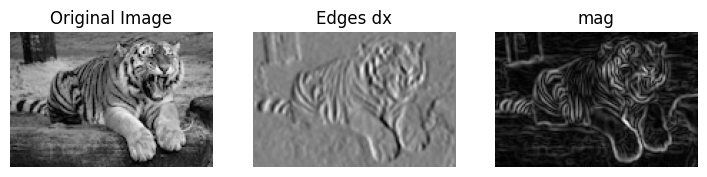

In [8]:
# Read the image
image = cv2.imread('data/images/tiger.jpg', cv2.IMREAD_GRAYSCALE)

# Apply the Sobel edge 
sobelx = cv2.Sobel(src=image, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=image, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
#sobelxy = cv2.Sobel(src=image, ddepth=cv2.CV_8U, dx=1, dy=1, ksize=3)
mag = np.sqrt(sobelx**2 + sobely**2)

# Display the original image and the edges side by side
plt.figure(figsize=(12, 10))
plt.subplot(141), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(142), plt.imshow(sobelx, cmap='gray')
plt.title('Edges dx'), plt.axis('off')
plt.subplot(143), plt.imshow(mag, cmap='gray')
plt.title('mag'), plt.axis('off')
#plt.subplot(144), plt.imshow(sobelxy, cmap='gray')
#plt.title('Sobelxy'), plt.axis('off')


plt.show()


## Edge detection in Noisy images

(Text(0.5, 1.0, 'Edges dy'), (-0.5, 99.5, 99.5, -0.5))

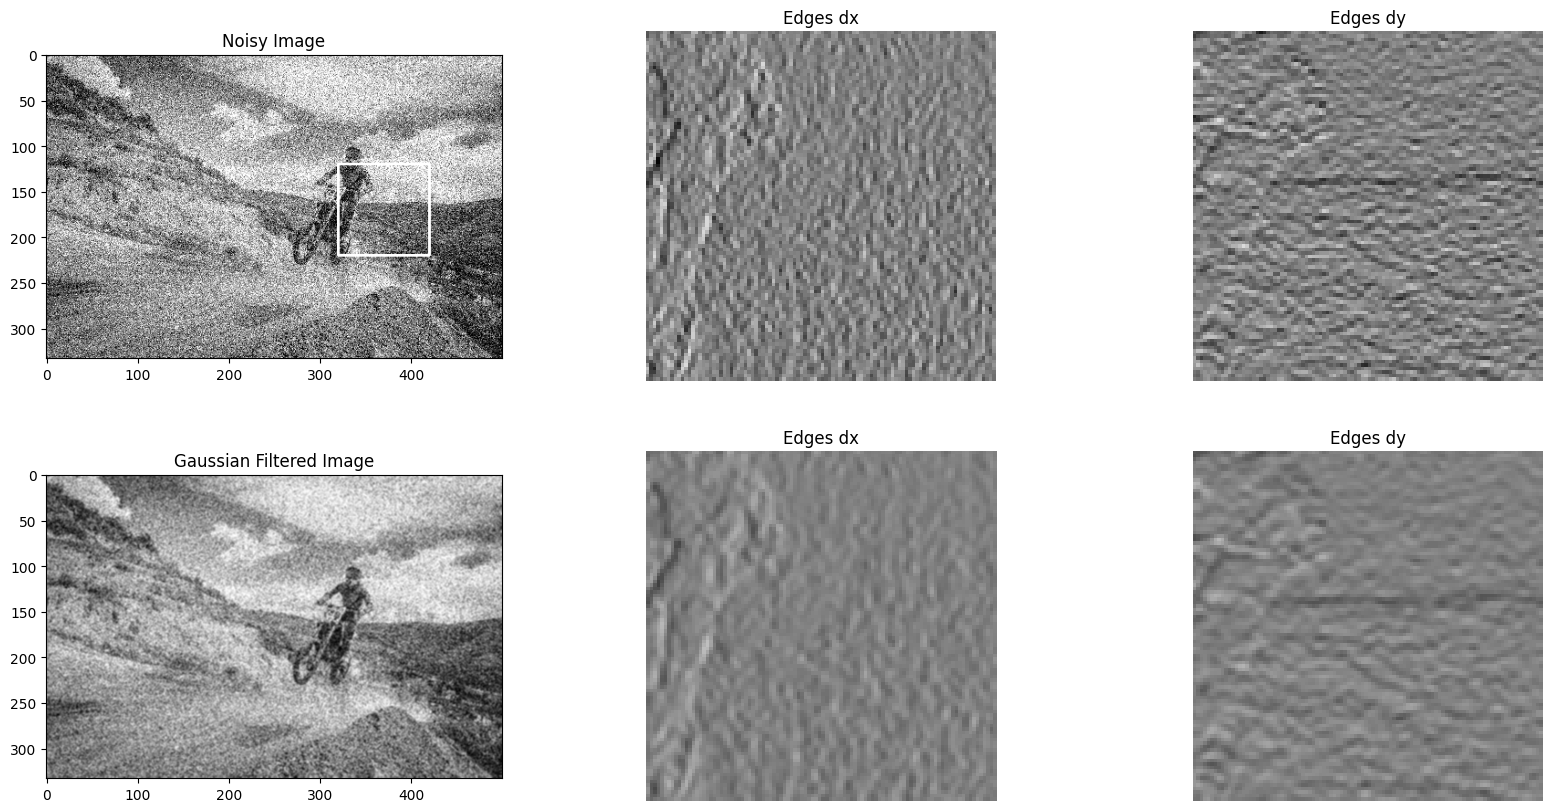

In [10]:
# Read the image
image = cv2.imread('./data/images/motorbike.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (int(image.shape[1]/3), int(image.shape[0]/3)), interpolation=cv2.INTER_LINEAR) 
noisy_image = gaussian_noise(image, sigma=50)
gaussian_filtered_image = cv2.GaussianBlur(noisy_image, ksize=(3,3), sigmaX = 1, sigmaY = 1)

# Apply the sobel edge detection
edgesx = cv2.filter2D(noisy_image, cv2.CV_32F, kernelx)
edgesy = cv2.filter2D(noisy_image, cv2.CV_32F, kernely)

gedgesx = cv2.filter2D(gaussian_filtered_image, cv2.CV_32F, kernelx)
gedgesy = cv2.filter2D(gaussian_filtered_image, cv2.CV_32F, kernely)


x1, y1, x2, y2 = 320, 120, 420, 220
# Draw a red rectangular box on the image
cv2.rectangle(noisy_image, (x1, y1), (x2, y2), (255, 0, 0), 2) 

# Display the original image and the edges side by side
plt.figure(figsize=(20, 10))
plt.subplot(231), plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image'), 
plt.subplot(232), plt.imshow(edgesx[y1:y2, x1:x2], cmap='gray', vmin=-1000, vmax=1000)
plt.title('Edges dx'), plt.axis('off')
plt.subplot(233), plt.imshow(edgesy[y1:y2, x1:x2], cmap='gray', vmin=-1000, vmax=1000)
plt.title('Edges dy'), plt.axis('off')

plt.subplot(234), plt.imshow(gaussian_filtered_image, cmap='gray')
plt.title('Gaussian Filtered Image'), 
plt.subplot(235), plt.imshow(gedgesx[y1:y2, x1:x2], cmap='gray', vmin=-1000, vmax=1000)
plt.title('Edges dx'), plt.axis('off')
plt.subplot(236), plt.imshow(gedgesy[y1:y2, x1:x2], cmap='gray', vmin=-1000, vmax=1000)
plt.title('Edges dy'), plt.axis('off')



**Note:** The OpenCV Sobel operators (```cv.Sobel```) combine Gaussian smoothing and differentiation, so the result is more or less resistant to the noise. 

## Canny Edge Detector

(Text(0.5, 1.0, 'Canny Edges'), (-0.5, 1499.5, 999.5, -0.5))

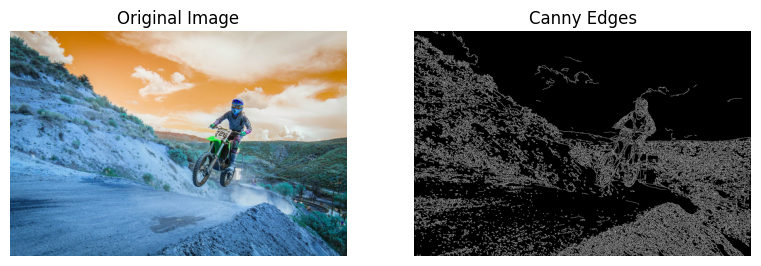

In [12]:
# Read the image
image = cv2.imread('./data/images/motorbike.jpeg')

# Apply the Canny edge detector, 
# apertureSize controls the size of the kernel.
# increasing the apertureSize will increase the smoothness
edges = cv2.Canny(image, threshold1=100, threshold2=200, apertureSize=3)

# Display the original image and the edges side by side
plt.figure(figsize=(20, 10))
plt.subplot(141), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(142), plt.imshow(edges, cmap='gray')
plt.title('Canny Edges'), plt.axis('off')


In [13]:
orientations = np.arctan2(2, 1)

# Optional: Convert to degrees
orientations_deg = np.degrees(orientations)
print(orientations_deg)

63.43494882292201
